In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
from master import *
import numpy as np

# F1ef:  drift with slow homeostasis

<IPython.core.display.Javascript object>

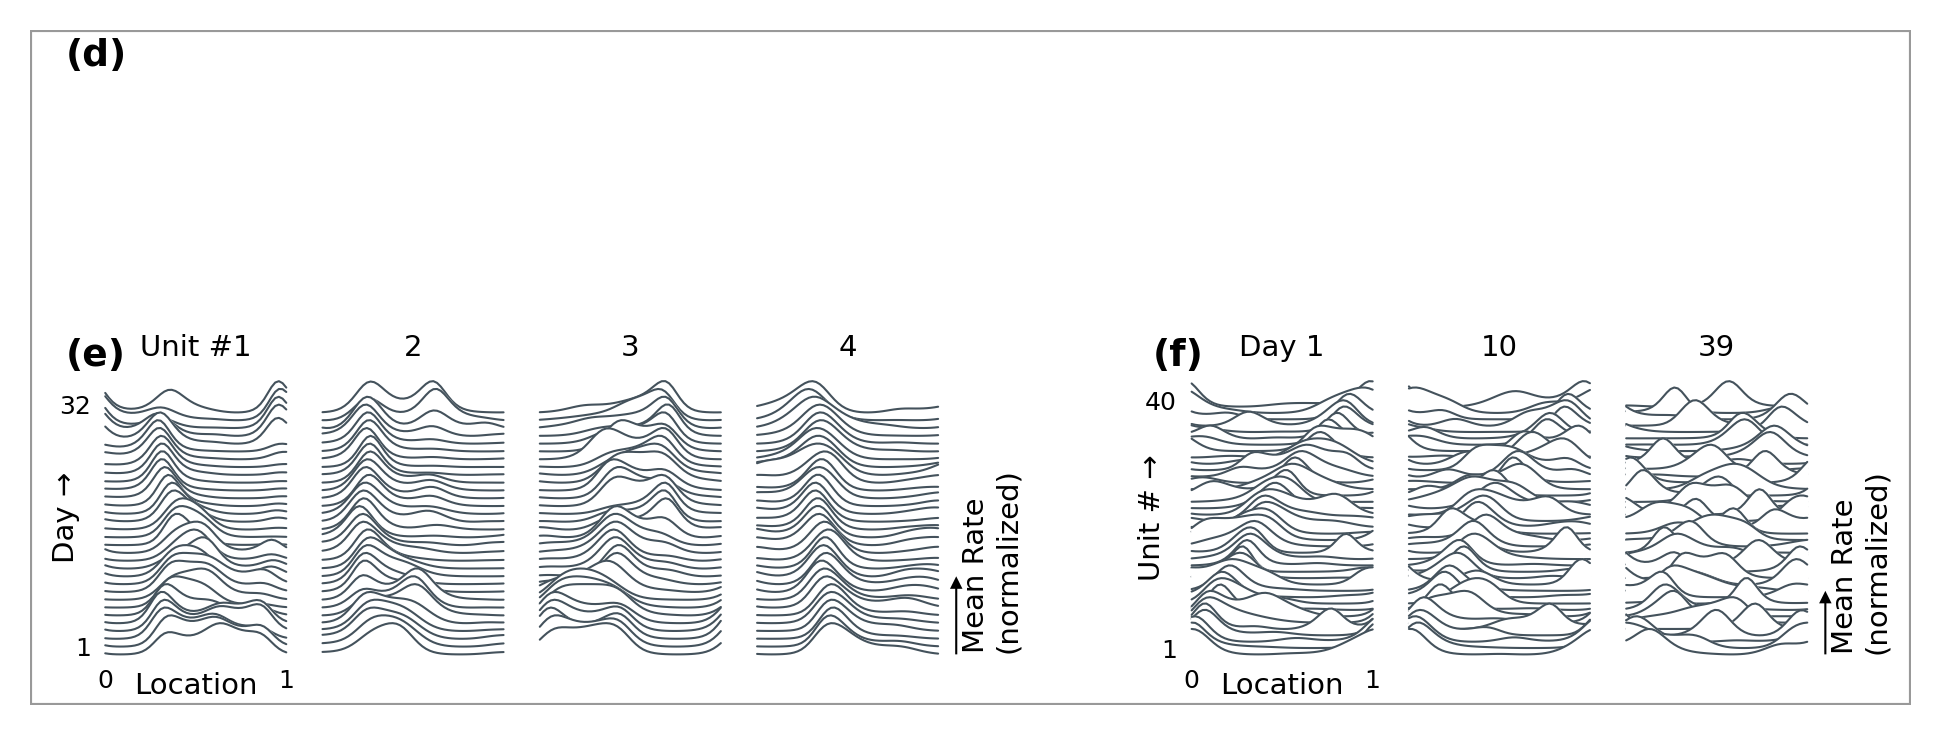

In [50]:
dy = 0.25
L = 50
K = 40
T = 40
σ = 6
τ = 45

# Get drifting features
X = get_OUlogGP_features_vectorized(L,K,T+50,σ,τ,geometry='ring')[-T:]
X = X.transpose(1,0,2)

def subfigureE(axs,jshow):
    tshow = TSHOW[:32]
    NSHOW = len(axs)
    for j,ax in en|axs:
        sca(ax)
        q = unitscale(X[jshow[j]][tshow],axis=1)
        waterfall_plot(h,q,dy=dy,draw_ratelabel=j==NSHOW-1)
        if j: noxyaxes();
        else: ylabel('Day →'); fudgey(5);
        title(('' if j else 'Unit #')+'%d'%(jshow[j]+1))
        
def subfigureF(axs,dd):
    NSHOW = len(axs)
    tt = TSHOW[array(dd)]
    o  = argsort(argmax(X[:,tt[0],:],1))
    for j,(t,ax) in en|zip(tt,axs):
        sca(ax)
        q = unitscale(X[o,t,:],axis=1)
        waterfall_plot(h,q,dy=dy,draw_ratelabel=j==NSHOW-1)
        if j: noxyaxes();
        else: ylabel('Unit # →'); fudgey(5);
        title(('' if j else 'Day ')+'%d'%(dd[j]+1))

h      = np.linspace(0,1,L)
TSHOW  = arange(40)
NSHOWA = 4
NSHOWB = 3
NCOL   = NSHOWA+NSHOWB+1

figure(figsize=(TEXTWIDTH,2.25),dpi=300)
subplots_adjust(wspace=0.2,hspace=.1,left=0.04,bottom=0.075,top=0.925,right=.945)
axs0 = [subplot2grid((2,NCOL),(0,0),colspan=NCOL)]
axs1 = [subplot2grid((2,NCOL),(1,i)) for i in range(NSHOWA)]
axs2 = [subplot2grid((2,NCOL),(1,NSHOWA+1+i)) for i in range(NSHOWB)]
subfigureE(axs1,[0,1,2,3])
subfigureF(axs2,[0,9,38])
sca(axs0[0]); subfigurelabel('(d)',fontsize=9); noxyaxes();
sca(axs1[0]); subfigurelabel('(e)',fontsize=9); fudgex(5);  
sca(axs2[0]); subfigurelabel('(f)',fontsize=9); fudgex(5); 
figurebox()
savefigure('f1def_small_v3',stamp=False)
notify('done')